In [2]:
!nvidia-smi

Mon Mar 28 10:28:12 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
!pip install tensorflow==2.3.0

     |████████████████████████████████| 320.4 MB 48 kB/s 
     |████████████████████████████████| 20.1 MB 1.3 MB/s 
     |████████████████████████████████| 459 kB 46.6 MB/s 
     |████████████████████████████████| 2.9 MB 31.3 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.0
    Uninstalling tensorflow-2.8.0:
 

In [1]:
!wget https://www.dropbox.com/s/xavrg0qkzrxt6ax/C_5500.zip?dl=0

--2022-03-28 10:29:50--  https://www.dropbox.com/s/xavrg0qkzrxt6ax/C_5500.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/xavrg0qkzrxt6ax/C_5500.zip [following]
--2022-03-28 10:29:50--  https://www.dropbox.com/s/raw/xavrg0qkzrxt6ax/C_5500.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb33ce8319de30db0aa822ef09c.dl.dropboxusercontent.com/cd/0/inline/BiVAJdlKmGbnee7iK0wJoFropxW7h-oj6HtIGtZ-67xyuCQGz6j39NMGZLkAOvzZfHWEnP136e2VngCKo0e4H6WgWjXZJZcoepNXvqJ3uI3mow9X2V6QvhAlDPY2v6wnD4csnTf3s2nEhZ1b9nN5OZ0U3m9tnAaw3P1gxEix_0pJNA/file# [following]
--2022-03-28 10:29:50--  https://ucb33ce8319de30db0aa822ef09c.dl.dropboxusercontent.com/cd/0/inline/BiVAJdlKmGbnee7iK0wJoFropxW7h-oj6HtIGtZ-67xyuCQGz6j39NMGZLkAOvzZfHWEn

In [2]:
!unzip -q "/content/C_5500.zip?dl=0"

In [3]:
!wget https://www.dropbox.com/s/eejq0u5mmbuk4oj/autoencoder_3.zip?dl=0

--2022-03-28 10:30:10--  https://www.dropbox.com/s/eejq0u5mmbuk4oj/autoencoder_3.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/eejq0u5mmbuk4oj/autoencoder_3.zip [following]
--2022-03-28 10:30:11--  https://www.dropbox.com/s/raw/eejq0u5mmbuk4oj/autoencoder_3.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc13f0b31ffa51819c234ba844e8.dl.dropboxusercontent.com/cd/0/inline/BiVJAZux5zVGiIrLgPSaRXAVYtMXO36Zcwcq5byhm-qZFfKZwnYk2-D0zdkA9thysyobFFnKwUpklY_agztRKjUW0pcRJ6VXIxUe2K1asEjc3Wa9ZxUpkWGNbJdVuGCnqboiUnlkowVJu4WetR_W6ipwD-bjMrPnwgtdg7M9wRI-OA/file# [following]
--2022-03-28 10:30:11--  https://uc13f0b31ffa51819c234ba844e8.dl.dropboxusercontent.com/cd/0/inline/BiVJAZux5zVGiIrLgPSaRXAVYtMXO36Zcwcq5byhm-qZFfKZ

In [4]:
!unzip -q "/content/autoencoder_3.zip?dl=0"

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
#Size of our input images
SIZE = 304

In [3]:
batch_size = 32
datagen = ImageDataGenerator(rescale=1./255)
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)

In [4]:
train_generator = train_datagen.flow_from_directory(
    'E:\\Data\\Dataset_3_channel\\Train\\False',
    target_size=(SIZE, SIZE),
    batch_size=batch_size,
    class_mode='input',
    subset='training'
    )

validation_generator = train_datagen.flow_from_directory(
    'E:\\Data\\Dataset_3_channel\\Train\\False',
    target_size=(SIZE, SIZE),
    batch_size=batch_size,
    class_mode='input',
    subset='validation'
    )

anomaly_generator = datagen.flow_from_directory(
    'E:\\Data\\Dataset_3_channel\\Test\\Defective',
    target_size=(SIZE, SIZE),
    batch_size=batch_size,
    class_mode='input'
    )

Found 821 images belonging to 1 classes.
Found 91 images belonging to 1 classes.
Found 912 images belonging to 1 classes.


In [5]:
import tensorflow

In [6]:
mse = tensorflow.keras.metrics.MeanSquaredError(name="mse", dtype=None)

In [11]:
#Define the autoencoder. 
#Try to make the bottleneck layer size as small as possible to make it easy for
#density calculations and also picking appropriate thresholds. 

#Encoder
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))

#Decoder
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))

model.add(Conv2D(3, (3, 3), activation='sigmoid', padding='same'))


model.compile(optimizer='adam', loss='mean_squared_error', metrics=[mse,'accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 304, 304, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 152, 152, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 152, 152, 32)      18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 76, 76, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 76, 76, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 38, 38, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 38, 38, 8)         1

In [12]:
# Defining our callbacks 
checkpoint = tensorflow.keras.callbacks.ModelCheckpoint("/content/C_5500/bwC_auto.h5",verbose=1,save_best_only=True,save_weights_only = True, monitor='mse')

csv_log = tensorflow.keras.callbacks.CSVLogger('AutoC4.csv', separator=',', append=False)

In [13]:
loaded_model = tensorflow.keras.models.load_model("/content/C_5500/auto_C_5500.h5", custom_objects={"mse": mse})

In [14]:
# Fit the model. 
history = loaded_model.fit(
        train_generator,
        steps_per_epoch= train_generator.samples // batch_size,
        epochs=500,
        validation_data=validation_generator,
        validation_steps= validation_generator.samples // batch_size,
        callbacks=[checkpoint, csv_log],
        shuffle = True)

Epoch 1/500
25/25 [==============================] - ETA: 0s - loss: 2.6951e-04 - mse: 2.6951e-04 - accuracy: 0.8309
Epoch 00001: mse improved from inf to 0.00027, saving model to /content/C_5500/bwC_auto.h5
25/25 [==============================] - 13s 533ms/step - loss: 2.6951e-04 - mse: 2.6951e-04 - accuracy: 0.8309 - val_loss: 3.0191e-04 - val_mse: 3.0191e-04 - val_accuracy: 0.8622
Epoch 2/500
25/25 [==============================] - ETA: 0s - loss: 2.6001e-04 - mse: 2.6001e-04 - accuracy: 0.8309
Epoch 00002: mse improved from 0.00027 to 0.00026, saving model to /content/C_5500/bwC_auto.h5
25/25 [==============================] - 11s 441ms/step - loss: 2.6001e-04 - mse: 2.6001e-04 - accuracy: 0.8309 - val_loss: 2.9543e-04 - val_mse: 2.9543e-04 - val_accuracy: 0.8629
Epoch 3/500
25/25 [==============================] - ETA: 0s - loss: 2.5913e-04 - mse: 2.5913e-04 - accuracy: 0.8317
Epoch 00003: mse improved from 0.00026 to 0.00026, saving model to /content/C_5500/bwC_auto.h5
25/25 [=

In [15]:
# Load the best weights
loaded_model.load_weights("/content/C_5500/bwC_auto.h5")

In [16]:
# Save the whole model (weigths + architecture)
loaded_model.save("auto_C_6000.h5")

In [66]:
loaded_model2 = tensorflow.keras.models.load_model("auto_C_6800.h5", custom_objects={"mse": mse})

In [67]:
#Fit the model. 
history2 = loaded_model2.fit(
        train_generator,
        steps_per_epoch= train_generator.samples // batch_size,
        epochs=200,
        validation_data=validation_generator,
        validation_steps= validation_generator.samples // batch_size,
        callbacks=[checkpoint, csv_log],
        shuffle = True)

Epoch 1/200
25/25 [==============================] - ETA: 0s - loss: 3.3251e-04 - mse: 3.3251e-04 - accuracy: 0.8240
Epoch 00001: mse did not improve from 0.00024
25/25 [==============================] - 12s 476ms/step - loss: 3.3251e-04 - mse: 3.3251e-04 - accuracy: 0.8240 - val_loss: 3.2912e-04 - val_mse: 3.2912e-04 - val_accuracy: 0.8614
Epoch 2/200
25/25 [==============================] - ETA: 0s - loss: 2.6914e-04 - mse: 2.6914e-04 - accuracy: 0.8266
Epoch 00002: mse did not improve from 0.00024
25/25 [==============================] - 12s 463ms/step - loss: 2.6914e-04 - mse: 2.6914e-04 - accuracy: 0.8266 - val_loss: 2.6453e-04 - val_mse: 2.6453e-04 - val_accuracy: 0.8632
Epoch 3/200
25/25 [==============================] - ETA: 0s - loss: 2.4872e-04 - mse: 2.4872e-04 - accuracy: 0.8333
Epoch 00003: mse did not improve from 0.00024
25/25 [==============================] - 11s 431ms/step - loss: 2.4872e-04 - mse: 2.4872e-04 - accuracy: 0.8333 - val_loss: 3.0807e-04 - val_mse: 3.080

In [68]:
# Load the best weights
loaded_model2.load_weights("/content/C_5500/bwC_auto.h5")

In [69]:
# Save the whole model (weigths + architecture)
loaded_model2.save("auto_C_7000.h5")

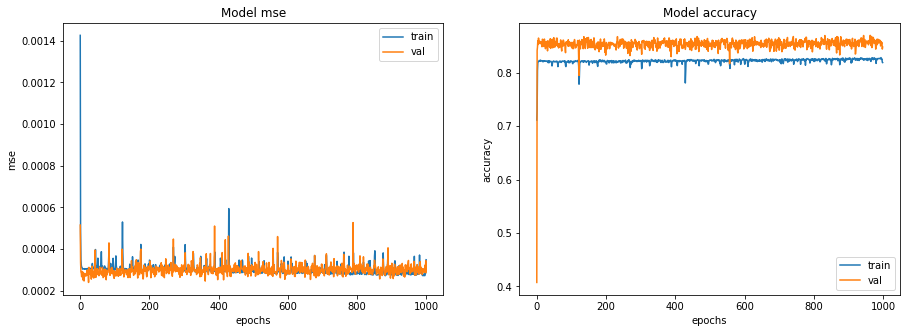

In [ ]:
# Interpreting the Metrics 
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax = ax.ravel()

for i, met in enumerate(['mse', 'accuracy']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [5]:
import tensorflow

In [7]:
loaded_model2 = tensorflow.keras.models.load_model("auto_C_7000.h5", compile=False)

## False Reconstruction

In [8]:
# Get all batches generated by the datagen and pick a batch for prediction, Just to test the model.

data_batch = []  #Capture all training batches as a numpy array

img_num = 0

while img_num <= train_generator.batch_index:   # gets each generated batch of size batch_size
    data = train_generator.next()
    data_batch.append(data[0])
    img_num = img_num + 1

In [11]:
len(data_batch)

26

In [12]:
len(data_batch[0])

32

In [13]:
data_batch[1].shape

(32, 304, 304, 3)

In [163]:
img_num # because len(train_generator) = 26

26

In [9]:
#Predict on the first batch of images
predicted = loaded_model2.predict(data_batch[2]) # if try different data

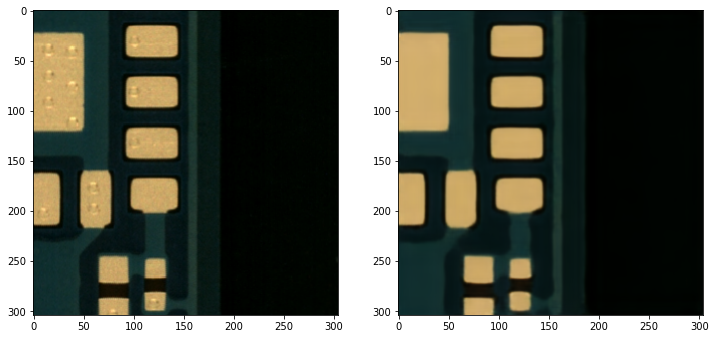

In [10]:
#Sanity check, view few images and corresponding reconstructions
image_number = random.randint(0, predicted.shape[0])
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(data_batch[2][image_number]) # if want to try different data
plt.subplot(122)
plt.imshow(predicted[image_number])
plt.show()

## Defect Reconstruction

In [136]:
# Get all batches generated by the datagen and pick a batch for prediction, Just to test the model.

data_batch2 = []  #Capture all training batches as a numpy array

img_num2 = 0

while img_num2 <= anomaly_generator.batch_index:   # gets each generated batch of size batch_size
    data2 = anomaly_generator.next()
    data_batch2.append(data2[0])
    img_num2 = img_num2 + 1

In [157]:
#Predict on the first batch of images
predicted2 = loaded_model2.predict(data_batch2[1]) # if try different data

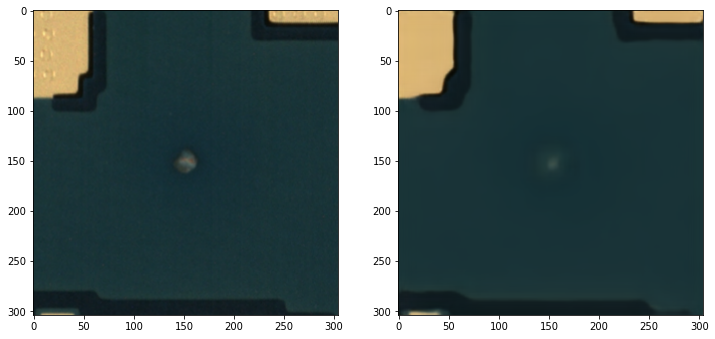

In [158]:
#Sanity check, view few images and corresponding reconstructions
image_number2 = random.randint(0, predicted.shape[0])
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(data_batch2[1][image_number2]) # if want to try different data
plt.subplot(122)
plt.imshow(predicted2[image_number2])
plt.show()

In [11]:
loaded_model2.compile(optimizer='adam', loss='mean_squared_error', metrics=[mse,'accuracy'])

In [12]:
#Let us examine the reconstruction error between our validation data (good/normal images)
# and the anomaly images
validation_error = loaded_model2.evaluate(validation_generator)
anomaly_error = loaded_model2.evaluate(anomaly_generator)

29/29 [==============================] - 42s 1s/step - loss: 8.4469e-04 - mse: 8.4469e-04 - accuracy: 0.8416


In [13]:
print("Recon. error for the validation (normal) data is: ", validation_error)
print("Recon. error for the anomaly data is: ", anomaly_error)

Recon. error for the validation (normal) data is:  [0.0002974804665427655, 0.00029748043743893504, 0.8539891839027405]
Recon. error for the anomaly data is:  [0.0008446900174021721, 0.0008446902502328157, 0.8415852785110474]


## Discriminator Network work

In [14]:
# Let us extract (or build) the encoder network, with trained weights.

# This is used to get the compressed output (latent space) of the input image.

# The compressed output is then used to calculate the KDE

encoder_model = Sequential()
encoder_model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3), weights=loaded_model2.layers[0].get_weights()) )
encoder_model.add(MaxPooling2D((2, 2), padding='same'))
encoder_model.add(Conv2D(32, (3, 3), activation='relu', padding='same', weights=loaded_model2.layers[2].get_weights()))
encoder_model.add(MaxPooling2D((2, 2), padding='same'))
encoder_model.add(Conv2D(16, (3, 3), activation='relu', padding='same', weights=loaded_model2.layers[4].get_weights()))
encoder_model.add(MaxPooling2D((2, 2), padding='same'))
encoder_model.add(Conv2D(8, (3, 3), activation='relu', padding='same', weights=loaded_model2.layers[6].get_weights()))
encoder_model.add(MaxPooling2D((2, 2), padding='same'))
encoder_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 304, 304, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 152, 152, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 152, 152, 32)      18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 76, 76, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 76, 76, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 38, 38, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 38, 38, 8)         1

In [15]:
# Calculate KDE using sklearn
from sklearn.neighbors import KernelDensity

#Get encoded output of input images = Latent space
encoded_images = encoder_model.predict(train_generator)

In [159]:
encoded_images.shape

(821, 19, 19, 8)

In [16]:
# Flatten the encoder output because KDE from sklearn takes 1D vectors as input

encoder_output_shape = encoder_model.output_shape
print("encoder_output_shape: ", encoder_output_shape)

out_vector_shape = encoder_output_shape[1]*encoder_output_shape[2]*encoder_output_shape[3]
print("out_vector_shape: ", out_vector_shape)

encoder_output_shape:  (None, 19, 19, 8)
out_vector_shape:  2888


In [20]:
encoded_images_vector = [np.reshape(img, (out_vector_shape)) for img in encoded_images] # 3 channel to 1d vector convert
# converting image shape into vector shape which will be use for calculating KDE

# 3 channel = image shape
# 1d vector shape = 2888 = (2888,)

In [165]:
encoded_images_vector[0], len(encoded_images_vector[0])

(array([0.970899  , 0.        , 0.91321224, ..., 0.3060607 , 0.32347947,
        0.16225848], dtype=float32),
 2888)

In [21]:
#Fit KDE to the image latent data
kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(encoded_images_vector)

In [19]:
kde.score_samples(encoded_images_vector)[0]

1987.4516841053892

In [20]:
import seaborn as sns

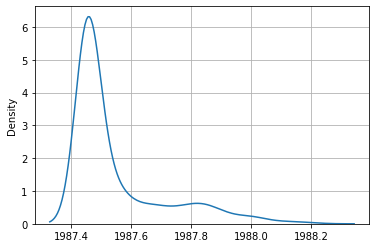

In [73]:
import seaborn as sns
sns.kdeplot(data=kde.score_samples(encoded_images_vector)) #, palette="tab10")
plt.grid()  #just add this
plt.show()

In [22]:
# Calculate density and reconstruction error to find their means values for good and anomaly images. 
# We use these mean and sigma to set thresholds.

def calc_density_and_recon_error(batch_images):
    
    density_list=[]
    recon_error_list=[]
    
    for im in range(0, batch_images.shape[0]):
        
        img  = batch_images[im]
        img = img[np.newaxis, :,:,:]
        
        encoded_img = encoder_model.predict([[img]]) # Create a compressed version of the image using the encoder
        
        encoded_img = [np.reshape(img, (out_vector_shape)) for img in encoded_img] # Flatten the compressed image
        
        density = kde.score_samples(encoded_img)[0] # get a density score for the new image
    
        
        reconstruction = loaded_model2.predict([[img]])
        
        reconstruction_error = loaded_model2.evaluate([reconstruction],[[img]], batch_size = 1)[0]
        
        density_list.append(density)
        
        recon_error_list.append(reconstruction_error)
        
    average_density = np.mean(np.array(density_list))  
    stdev_density = np.std(np.array(density_list)) 
    
    average_recon_error = np.mean(np.array(recon_error_list))  
    stdev_recon_error = np.std(np.array(recon_error_list)) 
    
    return average_density, stdev_density, average_recon_error, stdev_recon_error, density_list, recon_error_list

In [23]:
#Get average and std dev. of density and recon. error for uninfected and anomaly (parasited) images. 
#For this let us generate a batch of images for each. 
train_batch = train_generator.next()[0]
anomaly_batch = anomaly_generator.next()[0]

uninfected_values = calc_density_and_recon_error(train_batch)
anomaly_values = calc_density_and_recon_error(anomaly_batch)

1/1 [==============================] - 0s 65ms/step - loss: 0.0074 - mse: 0.0074 - accuracy: 0.7834


In [72]:
train_batch.shape

(32, 304, 304, 3)

In [24]:
uninfected_values

(1987.5358953091963,
 0.12718628602183024,
 0.00043941062222074834,
 0.0003023269395047071,
 [1987.4516926101421,
  1987.451684105134,
  1987.4516841168938,
  1987.9082068880707,
  1987.4517064911017,
  1987.4744101238862,
  1987.5428331485662,
  1987.451684105134,
  1987.8506069428956,
  1987.4516859617333,
  1987.5028447924703,
  1987.4516842062906,
  1987.657465961168,
  1987.6012234138914,
  1987.4516841077198,
  1987.5297374457455,
  1987.4524277809996,
  1987.5446617888404,
  1987.498540222883,
  1987.4516841064556,
  1987.6419319249596,
  1987.5352622191795,
  1987.451684105134,
  1987.451692009528,
  1987.4516841051436,
  1987.451684105134,
  1987.4516848824671,
  1987.7800296764021,
  1987.7701802267916,
  1987.6291708005526,
  1987.4516848340143,
  1987.4538126849595],
 [0.0005296330200508237,
  0.0003866013721562922,
  0.0005694754654541612,
  0.00019720605632755905,
  5.6174074416048825e-05,
  0.00017749548715073615,
  0.0005840808735229075,
  0.0006633814773522317,
  0.000

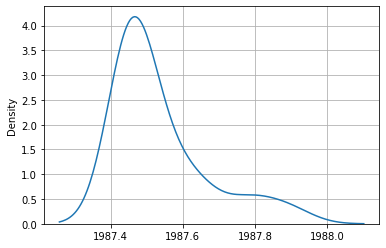

In [46]:
import seaborn as sns
sns.kdeplot(uninfected_values[4])#, anomaly_values[4]) #, palette="tab10")
plt.grid()  #just add this
plt.show()

C:\Users\Sachin Kumar Jha\.conda\envs\pcb\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


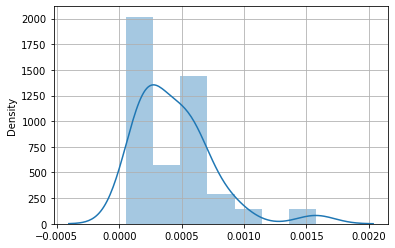

In [49]:
import seaborn as sns
sns.distplot(uninfected_values[5])#, anomaly_values[4]) #, palette="tab10")
plt.grid()  #just add this
plt.show()

In [25]:
anomaly_values

(1608.4014111369167,
 385.9159687017712,
 0.0019276798686860275,
 0.0019316979474666102,
 [1957.5721336606828,
  1367.6123096864494,
  1957.3675350178266,
  1920.9002576412365,
  1022.5916693792769,
  1953.651628558319,
  1293.5944008035349,
  1958.8086626563481,
  1958.3400613166227,
  1381.3805059468168,
  1795.8119516653646,
  1957.6248163899265,
  1959.1401471649442,
  989.7968060948318,
  1957.0198567993143,
  1360.3079939251893,
  1493.4174092001265,
  853.4190966686074,
  1958.5487219085137,
  1956.2553690180066,
  1224.8478787441527,
  1402.5156312444196,
  1973.197451752175,
  1957.2786724970508,
  860.0564104967009,
  1957.6979794729689,
  1423.3017938017128,
  1957.972549630987,
  1213.3266026172632,
  1179.234325840419,
  1958.13061241273,
  1308.1239143688179],
 [0.0029616120737046003,
  0.0027622212655842304,
  0.003956480883061886,
  0.00014005468983668834,
  0.001354798674583435,
  0.00013412919361144304,
  0.003992200363427401,
  9.695040353108197e-05,
  0.000216727625

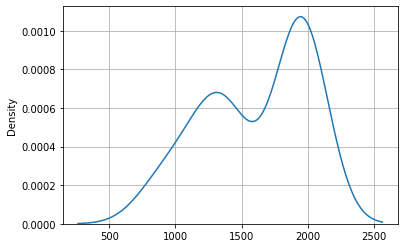

In [50]:
import seaborn as sns
sns.kdeplot(anomaly_values[4]) #, palette="tab10")
plt.grid()  #just add this
plt.show()

In [64]:
#Now, input unknown images and sort as Good or Anomaly
def check_anomaly(img_path):
   # n = 0
    density_threshold = 1970 #Set this value based on the above exercise
    reconstruction_error_threshold = 0.00116 # Set this value based on the above exercise
    img  = Image.open(img_path)
    img = np.array(img.resize((304,304), Image.ANTIALIAS)) # Image.ANTIALIAS will adjust the quality of resized image
    plt.imshow(img)
    img = img / 255.
    img = img[np.newaxis, :,:,:]
    encoded_img = encoder_model.predict([[img]]) 
    encoded_img = [np.reshape(img, (out_vector_shape)) for img in encoded_img] 
    density = kde.score_samples(encoded_img)[0] 

    reconstruction = loaded_model2.predict([[img]])
    reconstruction_error = loaded_model2.evaluate([reconstruction],[[img]], batch_size = 1)[0]

    if density < density_threshold or reconstruction_error > reconstruction_error_threshold:
        print("The image is an anomaly")
        return 0
        
    else:
        print("The image is NOT an anomaly")
        return 1

In [65]:
#Load a couple of test images and verify whether they are reported as anomalies.
import glob
para_file_paths = glob.glob('E:\\Data\\Dataset_3_channel\\Test\\Defective\\defect\\*')
uninfected_file_paths = glob.glob('E:\\Data\\Dataset_3_channel\\Train\\False\\false\\*')

In [62]:
from PIL import Image

In [63]:
len(para_file_paths)

912

In [64]:
[i for i in range(0,5)]

[0, 1, 2, 3, 4]

## Defect

In [66]:
n = 0

In [67]:
n1 = []

In [73]:
par1 = np.array([0]*912)
par2 = np.array([1]*912)
par = np.hstack((par1, par2))

In [74]:
par, len(par)

(array([0, 0, 0, ..., 1, 1, 1]), 1824)

1/1 [==============================] - 0s 94ms/step - loss: 6.1331e-04 - mse: 6.1331e-04 - accuracy: 0.7352
The image is an anomaly
1/1 [==============================] - 0s 101ms/step - loss: 8.1989e-05 - mse: 8.1989e-05 - accuracy: 0.8018
The image is an anomaly
1/1 [==============================] - 0s 99ms/step - loss: 3.8976e-04 - mse: 3.8976e-04 - accuracy: 0.9510
The image is an anomaly
1/1 [==============================] - 0s 96ms/step - loss: 0.0014 - mse: 0.0014 - accuracy: 0.8560
The image is an anomaly
1/1 [==============================] - 0s 112ms/step - loss: 0.0013 - mse: 0.0013 - accuracy: 0.6216
The image is an anomaly
1/1 [==============================] - 0s 136ms/step - loss: 0.0011 - mse: 0.0011 - accuracy: 0.7729
The image is an anomaly
1/1 [==============================] - 0s 99ms/step - loss: 9.0842e-04 - mse: 9.0842e-04 - accuracy: 0.7531
The image is an anomaly
1/1 [==============================] - 0s 107ms/step - loss: 7.0902e-04 - mse: 7.0902e-04 - accur

1/1 [==============================] - 0s 65ms/step - loss: 9.3727e-05 - mse: 9.3727e-05 - accuracy: 0.8935
The image is NOT an anomaly
1/1 [==============================] - 0s 55ms/step - loss: 1.3754e-04 - mse: 1.3754e-04 - accuracy: 0.9132
The image is an anomaly
1/1 [==============================] - 0s 65ms/step - loss: 1.5711e-04 - mse: 1.5711e-04 - accuracy: 0.8176
The image is an anomaly
1/1 [==============================] - 0s 71ms/step - loss: 0.0027 - mse: 0.0027 - accuracy: 0.8234
The image is an anomaly
1/1 [==============================] - 0s 71ms/step - loss: 1.0282e-04 - mse: 1.0282e-04 - accuracy: 0.8446
The image is an anomaly
1/1 [==============================] - 0s 67ms/step - loss: 8.7940e-04 - mse: 8.7940e-04 - accuracy: 0.9348
The image is an anomaly
1/1 [==============================] - 0s 64ms/step - loss: 0.0013 - mse: 0.0013 - accuracy: 0.8514
The image is an anomaly
1/1 [==============================] - 0s 60ms/step - loss: 0.0070 - mse: 0.0070 - accur

1/1 [==============================] - 0s 70ms/step - loss: 0.0032 - mse: 0.0032 - accuracy: 0.8408
The image is an anomaly
1/1 [==============================] - 0s 56ms/step - loss: 4.6884e-04 - mse: 4.6884e-04 - accuracy: 0.7151
The image is an anomaly
1/1 [==============================] - 0s 58ms/step - loss: 7.9403e-04 - mse: 7.9403e-04 - accuracy: 0.8583
The image is an anomaly
1/1 [==============================] - 0s 56ms/step - loss: 9.6588e-04 - mse: 9.6588e-04 - accuracy: 0.8528
The image is an anomaly
1/1 [==============================] - 0s 74ms/step - loss: 0.0027 - mse: 0.0027 - accuracy: 0.7438
The image is an anomaly
1/1 [==============================] - 0s 56ms/step - loss: 0.0038 - mse: 0.0038 - accuracy: 0.8240
The image is an anomaly
1/1 [==============================] - 0s 60ms/step - loss: 0.0015 - mse: 0.0015 - accuracy: 0.8859
The image is an anomaly
1/1 [==============================] - 0s 61ms/step - loss: 0.0031 - mse: 0.0031 - accuracy: 0.8113
The imag

1/1 [==============================] - 0s 64ms/step - loss: 0.0013 - mse: 0.0013 - accuracy: 0.9275
The image is an anomaly
1/1 [==============================] - 0s 64ms/step - loss: 0.0061 - mse: 0.0061 - accuracy: 0.6551
The image is an anomaly
1/1 [==============================] - 0s 64ms/step - loss: 1.0154e-04 - mse: 1.0154e-04 - accuracy: 0.9252
The image is an anomaly
1/1 [==============================] - 0s 56ms/step - loss: 0.0018 - mse: 0.0018 - accuracy: 0.7717
The image is an anomaly
1/1 [==============================] - 0s 64ms/step - loss: 9.7173e-04 - mse: 9.7173e-04 - accuracy: 0.8533
The image is an anomaly
1/1 [==============================] - 0s 56ms/step - loss: 8.3562e-04 - mse: 8.3562e-04 - accuracy: 0.7903
The image is an anomaly
1/1 [==============================] - 0s 64ms/step - loss: 7.0707e-05 - mse: 7.0707e-05 - accuracy: 0.9893
The image is NOT an anomaly
1/1 [==============================] - 0s 64ms/step - loss: 0.0032 - mse: 0.0032 - accuracy: 0.8

1/1 [==============================] - 0s 66ms/step - loss: 1.6834e-04 - mse: 1.6834e-04 - accuracy: 0.7730
The image is an anomaly
1/1 [==============================] - 0s 64ms/step - loss: 0.0016 - mse: 0.0016 - accuracy: 0.7731
The image is an anomaly
1/1 [==============================] - 0s 64ms/step - loss: 0.0012 - mse: 0.0012 - accuracy: 0.7483
The image is an anomaly
1/1 [==============================] - 0s 72ms/step - loss: 2.0981e-04 - mse: 2.0981e-04 - accuracy: 0.7171
The image is an anomaly
1/1 [==============================] - 0s 55ms/step - loss: 8.6360e-05 - mse: 8.6360e-05 - accuracy: 0.8763
The image is NOT an anomaly
1/1 [==============================] - 0s 50ms/step - loss: 9.7070e-05 - mse: 9.7070e-05 - accuracy: 0.5326
The image is NOT an anomaly
1/1 [==============================] - 0s 67ms/step - loss: 8.3369e-04 - mse: 8.3369e-04 - accuracy: 0.8057
The image is an anomaly
1/1 [==============================] - 0s 67ms/step - loss: 0.0011 - mse: 0.0011 - a

1/1 [==============================] - 0s 56ms/step - loss: 1.4325e-04 - mse: 1.4325e-04 - accuracy: 0.8073
The image is an anomaly
1/1 [==============================] - 0s 56ms/step - loss: 1.3876e-04 - mse: 1.3876e-04 - accuracy: 0.9793
The image is NOT an anomaly
1/1 [==============================] - 0s 65ms/step - loss: 0.0017 - mse: 0.0017 - accuracy: 0.9345
The image is an anomaly
1/1 [==============================] - 0s 64ms/step - loss: 0.0054 - mse: 0.0054 - accuracy: 0.6613
The image is an anomaly
1/1 [==============================] - 0s 65ms/step - loss: 9.6236e-05 - mse: 9.6236e-05 - accuracy: 0.9228
The image is an anomaly
1/1 [==============================] - 0s 65ms/step - loss: 0.0016 - mse: 0.0016 - accuracy: 0.7908
The image is an anomaly
1/1 [==============================] - 0s 56ms/step - loss: 0.0014 - mse: 0.0014 - accuracy: 0.8452
The image is an anomaly
1/1 [==============================] - 0s 67ms/step - loss: 0.0012 - mse: 0.0012 - accuracy: 0.7705
The 

1/1 [==============================] - 0s 75ms/step - loss: 0.0015 - mse: 0.0015 - accuracy: 0.7383
The image is an anomaly
1/1 [==============================] - 0s 72ms/step - loss: 1.5194e-04 - mse: 1.5194e-04 - accuracy: 0.7379
The image is an anomaly
1/1 [==============================] - 0s 60ms/step - loss: 8.7904e-05 - mse: 8.7904e-05 - accuracy: 0.8766
The image is NOT an anomaly
1/1 [==============================] - 0s 64ms/step - loss: 1.0435e-04 - mse: 1.0435e-04 - accuracy: 0.5365
The image is NOT an anomaly
1/1 [==============================] - 0s 64ms/step - loss: 6.8429e-04 - mse: 6.8429e-04 - accuracy: 0.7992
The image is an anomaly
1/1 [==============================] - 0s 68ms/step - loss: 0.0019 - mse: 0.0019 - accuracy: 0.8073
The image is an anomaly
1/1 [==============================] - 0s 72ms/step - loss: 8.4864e-04 - mse: 8.4864e-04 - accuracy: 0.8196
The image is an anomaly
1/1 [==============================] - 0s 65ms/step - loss: 0.0017 - mse: 0.0017 - a

1/1 [==============================] - 0s 59ms/step - loss: 0.0031 - mse: 0.0031 - accuracy: 0.8066
The image is an anomaly
1/1 [==============================] - 0s 73ms/step - loss: 0.0029 - mse: 0.0029 - accuracy: 0.7930
The image is an anomaly
1/1 [==============================] - 0s 60ms/step - loss: 0.0021 - mse: 0.0021 - accuracy: 0.7675
The image is an anomaly
1/1 [==============================] - 0s 69ms/step - loss: 0.0018 - mse: 0.0018 - accuracy: 0.7641
The image is an anomaly
1/1 [==============================] - 0s 56ms/step - loss: 2.4938e-04 - mse: 2.4938e-04 - accuracy: 0.9655
The image is an anomaly
1/1 [==============================] - 0s 63ms/step - loss: 7.9438e-04 - mse: 7.9438e-04 - accuracy: 0.8697
The image is an anomaly
1/1 [==============================] - 0s 64ms/step - loss: 3.0019e-04 - mse: 3.0019e-04 - accuracy: 0.9511
The image is an anomaly
1/1 [==============================] - 0s 64ms/step - loss: 0.0039 - mse: 0.0039 - accuracy: 0.8234
The imag

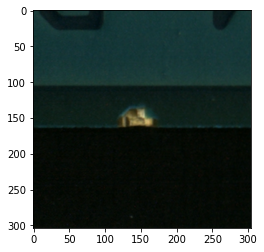

In [69]:
for i in range(0, len(para_file_paths)):
    x = check_anomaly(para_file_paths[i])
    if x == 0:
        n += 1
        n1.append(0)
    else:
        n1.append(1)  

In [71]:
n

869

In [72]:
print(n1.count(1))
print(n1.count(0))

43
869


## False

In [192]:
len(uninfected_file_paths)

912

In [75]:
m = 0

1/1 [==============================] - 0s 78ms/step - loss: 1.6274e-04 - mse: 1.6274e-04 - accuracy: 0.7965
The image is an anomaly
1/1 [==============================] - 0s 94ms/step - loss: 5.2461e-04 - mse: 5.2461e-04 - accuracy: 0.8531
The image is NOT an anomaly
1/1 [==============================] - 0s 115ms/step - loss: 0.0011 - mse: 0.0011 - accuracy: 0.9112
The image is an anomaly
1/1 [==============================] - 0s 86ms/step - loss: 1.8838e-04 - mse: 1.8838e-04 - accuracy: 0.8121
The image is an anomaly
1/1 [==============================] - 0s 94ms/step - loss: 2.2244e-04 - mse: 2.2244e-04 - accuracy: 0.6869
The image is NOT an anomaly
1/1 [==============================] - 0s 113ms/step - loss: 2.4056e-04 - mse: 2.4056e-04 - accuracy: 0.7123
The image is NOT an anomaly
1/1 [==============================] - 0s 71ms/step - loss: 2.8447e-04 - mse: 2.8447e-04 - accuracy: 0.7478
The image is NOT an anomaly
1/1 [==============================] - 0s 64ms/step - loss: 3.0071

1/1 [==============================] - 0s 64ms/step - loss: 7.9338e-04 - mse: 7.9338e-04 - accuracy: 0.9032
The image is NOT an anomaly
1/1 [==============================] - 0s 58ms/step - loss: 3.5906e-04 - mse: 3.5906e-04 - accuracy: 0.6666
The image is NOT an anomaly
1/1 [==============================] - 0s 66ms/step - loss: 2.1388e-04 - mse: 2.1388e-04 - accuracy: 0.8331
The image is NOT an anomaly
1/1 [==============================] - 0s 63ms/step - loss: 7.6162e-04 - mse: 7.6162e-04 - accuracy: 0.8710
The image is NOT an anomaly
1/1 [==============================] - 0s 56ms/step - loss: 5.3042e-04 - mse: 5.3042e-04 - accuracy: 0.7750
The image is NOT an anomaly
1/1 [==============================] - 0s 56ms/step - loss: 3.6784e-04 - mse: 3.6784e-04 - accuracy: 0.9806
The image is NOT an anomaly
1/1 [==============================] - 0s 64ms/step - loss: 2.4349e-04 - mse: 2.4349e-04 - accuracy: 0.7223
The image is NOT an anomaly
1/1 [==============================] - 0s 58ms/s

1/1 [==============================] - 0s 60ms/step - loss: 0.0011 - mse: 0.0011 - accuracy: 0.8638
The image is NOT an anomaly
1/1 [==============================] - 0s 66ms/step - loss: 8.0144e-04 - mse: 8.0144e-04 - accuracy: 0.8814
The image is NOT an anomaly
1/1 [==============================] - 0s 56ms/step - loss: 3.1207e-04 - mse: 3.1207e-04 - accuracy: 0.8281
The image is NOT an anomaly
1/1 [==============================] - 0s 56ms/step - loss: 6.4384e-04 - mse: 6.4384e-04 - accuracy: 0.8599
The image is NOT an anomaly
1/1 [==============================] - 0s 67ms/step - loss: 1.6406e-04 - mse: 1.6406e-04 - accuracy: 0.8000
The image is NOT an anomaly
1/1 [==============================] - 0s 61ms/step - loss: 5.9581e-04 - mse: 5.9581e-04 - accuracy: 0.8746
The image is NOT an anomaly
1/1 [==============================] - 0s 51ms/step - loss: 2.0479e-04 - mse: 2.0479e-04 - accuracy: 0.6674
The image is NOT an anomaly
1/1 [==============================] - 0s 67ms/step - lo

1/1 [==============================] - 0s 78ms/step - loss: 8.4141e-04 - mse: 8.4141e-04 - accuracy: 0.8627
The image is NOT an anomaly
1/1 [==============================] - 0s 60ms/step - loss: 2.2202e-04 - mse: 2.2202e-04 - accuracy: 0.6794
The image is NOT an anomaly
1/1 [==============================] - 0s 61ms/step - loss: 6.6607e-04 - mse: 6.6607e-04 - accuracy: 0.7867
The image is NOT an anomaly
1/1 [==============================] - 0s 75ms/step - loss: 1.8081e-04 - mse: 1.8081e-04 - accuracy: 0.7163
The image is NOT an anomaly
1/1 [==============================] - 0s 60ms/step - loss: 2.1260e-04 - mse: 2.1260e-04 - accuracy: 0.7773
The image is NOT an anomaly
1/1 [==============================] - 0s 58ms/step - loss: 2.1913e-04 - mse: 2.1913e-04 - accuracy: 0.8104
The image is NOT an anomaly
1/1 [==============================] - 0s 59ms/step - loss: 5.6295e-04 - mse: 5.6295e-04 - accuracy: 0.7359
The image is NOT an anomaly
1/1 [==============================] - 0s 60ms/s

1/1 [==============================] - 0s 61ms/step - loss: 8.7396e-05 - mse: 8.7396e-05 - accuracy: 0.7231
The image is NOT an anomaly
1/1 [==============================] - 0s 72ms/step - loss: 7.4090e-04 - mse: 7.4090e-04 - accuracy: 0.8832
The image is NOT an anomaly
1/1 [==============================] - 0s 52ms/step - loss: 3.1094e-04 - mse: 3.1094e-04 - accuracy: 0.7420
The image is NOT an anomaly
1/1 [==============================] - 0s 54ms/step - loss: 3.8764e-04 - mse: 3.8764e-04 - accuracy: 0.8765
The image is NOT an anomaly
1/1 [==============================] - 0s 62ms/step - loss: 1.4765e-04 - mse: 1.4765e-04 - accuracy: 0.8274
The image is NOT an anomaly
1/1 [==============================] - 0s 52ms/step - loss: 0.0011 - mse: 0.0011 - accuracy: 0.9035
The image is NOT an anomaly
1/1 [==============================] - 0s 76ms/step - loss: 1.9758e-04 - mse: 1.9758e-04 - accuracy: 0.6538
The image is NOT an anomaly
1/1 [==============================] - 0s 49ms/step - lo

1/1 [==============================] - 0s 59ms/step - loss: 6.4264e-04 - mse: 6.4264e-04 - accuracy: 0.8751
The image is NOT an anomaly
1/1 [==============================] - 0s 65ms/step - loss: 6.5336e-04 - mse: 6.5336e-04 - accuracy: 0.8616
The image is NOT an anomaly
1/1 [==============================] - 0s 58ms/step - loss: 9.6002e-04 - mse: 9.6002e-04 - accuracy: 0.8812
The image is NOT an anomaly
1/1 [==============================] - 0s 72ms/step - loss: 2.2826e-04 - mse: 2.2826e-04 - accuracy: 0.6849
The image is NOT an anomaly
1/1 [==============================] - 0s 72ms/step - loss: 2.1772e-04 - mse: 2.1772e-04 - accuracy: 0.7370
The image is NOT an anomaly
1/1 [==============================] - 0s 66ms/step - loss: 2.4580e-04 - mse: 2.4580e-04 - accuracy: 0.7556
The image is NOT an anomaly
1/1 [==============================] - 0s 65ms/step - loss: 2.5889e-04 - mse: 2.5889e-04 - accuracy: 0.7085
The image is NOT an anomaly
1/1 [==============================] - 0s 72ms/s

1/1 [==============================] - 0s 64ms/step - loss: 5.2448e-04 - mse: 5.2448e-04 - accuracy: 0.7358
The image is NOT an anomaly
1/1 [==============================] - 0s 59ms/step - loss: 7.1025e-04 - mse: 7.1025e-04 - accuracy: 0.9127
The image is NOT an anomaly
1/1 [==============================] - 0s 74ms/step - loss: 4.3818e-04 - mse: 4.3818e-04 - accuracy: 0.8546
The image is NOT an anomaly
1/1 [==============================] - 0s 58ms/step - loss: 2.2833e-04 - mse: 2.2833e-04 - accuracy: 0.7009
The image is NOT an anomaly
1/1 [==============================] - 0s 61ms/step - loss: 2.1574e-04 - mse: 2.1574e-04 - accuracy: 0.7744
The image is NOT an anomaly
1/1 [==============================] - 0s 68ms/step - loss: 2.4612e-04 - mse: 2.4612e-04 - accuracy: 0.7750
The image is NOT an anomaly
1/1 [==============================] - 0s 55ms/step - loss: 2.6039e-04 - mse: 2.6039e-04 - accuracy: 0.6988
The image is NOT an anomaly
1/1 [==============================] - 0s 59ms/s

1/1 [==============================] - 0s 60ms/step - loss: 5.7798e-04 - mse: 5.7798e-04 - accuracy: 0.7185
The image is NOT an anomaly
1/1 [==============================] - 0s 59ms/step - loss: 1.9244e-04 - mse: 1.9244e-04 - accuracy: 0.7291
The image is NOT an anomaly
1/1 [==============================] - 0s 61ms/step - loss: 2.2272e-04 - mse: 2.2272e-04 - accuracy: 0.7792
The image is NOT an anomaly
1/1 [==============================] - 0s 68ms/step - loss: 2.8242e-04 - mse: 2.8242e-04 - accuracy: 0.8315
The image is NOT an anomaly
1/1 [==============================] - 0s 59ms/step - loss: 7.1972e-04 - mse: 7.1972e-04 - accuracy: 0.7049
The image is NOT an anomaly
1/1 [==============================] - 0s 58ms/step - loss: 5.7873e-04 - mse: 5.7873e-04 - accuracy: 0.8627
The image is NOT an anomaly
1/1 [==============================] - 0s 68ms/step - loss: 1.9273e-04 - mse: 1.9273e-04 - accuracy: 0.8047
The image is NOT an anomaly
1/1 [==============================] - 0s 68ms/s

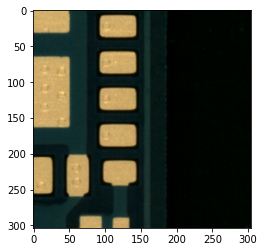

In [76]:
for j in range(0, len(uninfected_file_paths)):
    y = check_anomaly(uninfected_file_paths[j])
    if y == 1:
        m += 1
        n1.append(1)
    else:
        n1.append(0)

In [77]:
m

856

In [78]:
n1 = np.array(n1)

In [81]:
n1

array([0, 0, 0, ..., 1, 1, 1])

In [79]:
from sklearn.metrics import classification_report

In [80]:
print("Classification Report: \n", classification_report(par, n1, target_names=['Defect', 'False']))

Classification Report: 
               precision    recall  f1-score   support

      Defect       0.94      0.95      0.95       912
       False       0.95      0.94      0.95       912

    accuracy                           0.95      1824
   macro avg       0.95      0.95      0.95      1824
weighted avg       0.95      0.95      0.95      1824



1/1 [==============================] - 0s 47ms/step - loss: 0.0025 - mse: 0.0025 - accuracy: 0.7973
The image is an anomaly


0

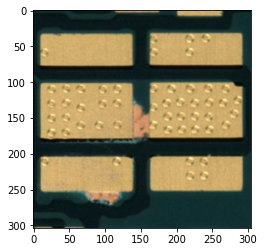

In [99]:
#Anomaly image verification
num=random.randint(0,len(para_file_paths))
check_anomaly(para_file_paths[num])

1/1 [==============================] - 0s 64ms/step - loss: 6.6716e-04 - mse: 6.6716e-04 - accuracy: 0.6720
The image is NOT an anomaly


1

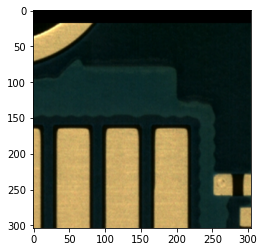

In [131]:
#Good/normal image verification
num=random.randint(0,len(uninfected_file_paths))
check_anomaly(uninfected_file_paths[num])